In [1]:
import numpy as np

import pandas as pd
from pandas.plotting import scatter_matrix

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from random import randrange

import re

import random
import pickle,pprint

%matplotlib inline

In [2]:
# this is just to have figure with large fontsize
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (8, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [3]:
U_t=15    # mV
D=2       # mV
C=1   # 10Hz-> 0.01ms^{-1}
dt=0.1    #ms
tau=20    #ms

In [4]:
def mu(t):
    if t<period1:  #ms
        return 8 #mV
    else :
        return 16 #mV

In [5]:
period1=70
t_max=period1+90

#period1=200
#t_max=period1+200

N_sim = int(t_max/dt)

# Macroscopique simulation of neurons

In [193]:
U_reset=0  

N_trials=100000

bin_width=10


spike_time=np.zeros((int(N_sim/bin_width),1))

                   
u_hist=np.zeros((N_sim,1))

                     
for i in range(N_trials): 
    if i%int(N_trials/10)==0:
        print(i)
    u=U_reset
    for n in range(N_sim):
        t=n*dt

        
        u=(1-dt/tau)*u+mu(t)*dt/tau
 
        if i==0:
            u_hist[n,0]=u
        rho=C*np.exp((u-U_t)/D)
        
        
    
        P_spike=1-np.exp(-rho*dt)

        rand_num=random.uniform(0, 1)
     
    
        if rand_num< P_spike:
            u=U_reset
            spike_time[int(n/bin_width),0]+=1
            
        
                     
                     

0
10000
20000
30000
40000
50000
60000
70000
80000
90000


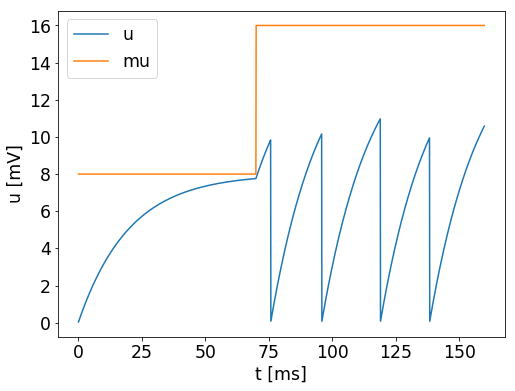

In [194]:
t_=np.copy([j*dt for j in range(N_sim)])
mu_=np.copy([mu(j) for j in t_])

plt.figure(figsize=(8,6))
plt.plot(t_, u_hist,label='u')
plt.plot(t_, mu_,label='mu')
plt.xlabel('t [ms]')
plt.ylabel('u [mV]')
plt.legend()

In [195]:
A_macro=spike_time/(N_trials*bin_width*dt)
t_A_macro=[(j+0.5)*dt*bin_width for j in range(int(N_sim/bin_width))]

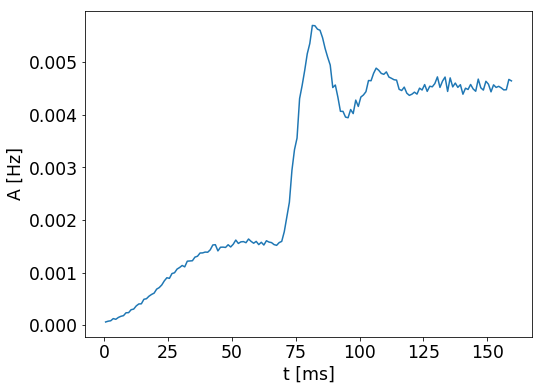

In [196]:
plt.figure(figsize=(8,6))
plt.plot(t_A_macro, spike_time/(N_trials*bin_width))
plt.xlabel('t [ms]')
plt.ylabel('A [Hz]')

## Macro density

In [210]:
t_max_d=150
n_start=int(100/dt)
N_sim_d = int(t_max_d/dt)
bin_width=20

N_trials_d=50000

spike_time_d=np.zeros((int(N_sim_d/bin_width),1))

refractory_time=np.zeros((int((N_sim_d-n_start)/bin_width),1))

mu_d=16
                  
for i in range(N_trials_d):   
    u=U_reset
    t_count=0
    if i%int(N_trials_d/10)==0:
        print(i)
    for n in range(N_sim_d):
       
            
        rho=C*np.exp((u-U_t)/D)
        u=(1-dt/tau)*u+mu_d*dt/tau
 
        P_spike=1-np.exp(-rho*dt)

        rand_num=random.uniform(0, 1)
        
        if (n>=n_start) :
                refractory_time[round(t_count/bin_width)]+=1
        
        if rand_num < P_spike:
            u=U_reset
            spike_time_d[int(n/bin_width),0]+=1
            t_count=0
            
                
        else:
            t_count+=1
                             

0
5000
10000
15000
20000
25000
30000
35000
40000
45000


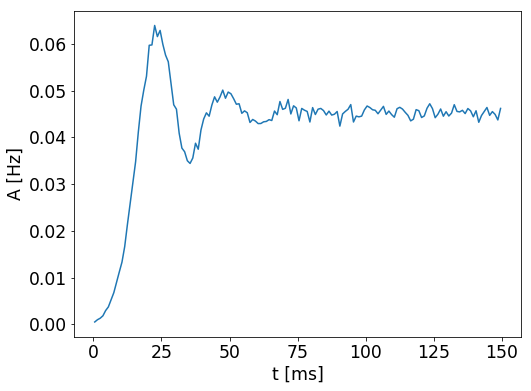

In [198]:
t_a_macro_d=[(j+0.5)*dt*bin_width for j in range(int(N_sim_d/bin_width))]
A_macro_d=spike_time_d/(N_trials_d*bin_width*dt)
plt.figure(figsize=(8,6))
plt.plot(t_a_macro_d, A_macro_d)
plt.xlabel('t [ms]')
plt.ylabel('A [Hz]')

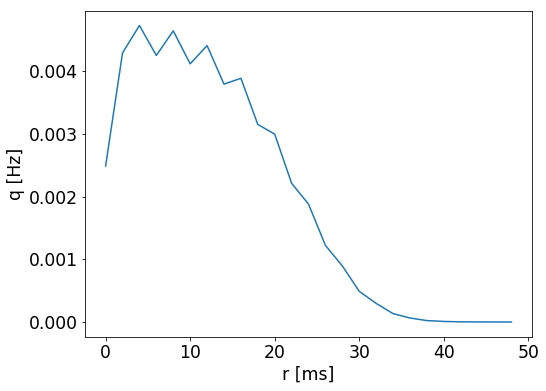

In [211]:
q_macro=(refractory_time/np.sum(refractory_time))/bin_width
t_q_macro=[(j)*dt*bin_width for j in range(len(refractory_time))]
plt.figure(figsize=(8,6))
plt.plot(t_q_macro, q_macro)
plt.xlabel('r [ms]')
plt.ylabel('q [Hz]')

In [212]:
data_macro = {'D': D,
              'C': C,
              'dt': dt,
              'N_sim': N_sim,
              'tau':tau,
              'U_reset':U_reset,
              'U_t': U_t,
              'mu': mu_,
              'bin_width':bin_width,
              'A_macro':A_macro,
              't_A_macro':t_A_macro,
              'q_macro':q_macro,
              't_q_macro':t_q_macro,
              }



output = open('data_macro'+str(D)+'.pkl', 'wb')

# Pickle dictionary using protocol 0.
pickle.dump(data_macro, output)


output.close()

In [103]:
pkl_file = open('data_macro'+str(D)+'.pkl', 'rb')

data_macro = pickle.load(pkl_file)
#pprint.pprint(data1)

pkl_file.close()

In [104]:
A_macro=data_macro[ 'A_macro']
t_A_macro=data_macro[ 't_A_macro']
q_macro= data_macro['q_macro']
t_q_macro= data_macro['t_q_macro']
N_sim= data_macro['N_sim']


## Density equation 

$ \frac{\partial}{\partial t}q(r,t)=-\frac{\partial}{\partial r}q(r,t)-\rho(t|t-r)q(r,t)+\delta(r)A(t)$

In [110]:
t_window=50
N=int(t_window/dt)

u_old=np.zeros((N+1,1))
u_new=np.zeros((N+1,1))


q_old=np.zeros((N+1,1))
q_old[0]=1

q=np.zeros((N+1,int(N_sim/10)))

A=np.zeros((N_sim,1))

q_new=np.zeros((N+1,1))

i_store=0

for it in range(N_sim):
    
    
    t=it*dt
    
    
   
    A[it]=q_new[0]/dt
    q_new = np.zeros((N + 1, 1))
    u_new = np.zeros((N + 1, 1))

    for ir in range(N):
        u_new[ir+1 ] = u_old[ir] * (1 - dt / tau) + mu(t) * dt / tau

        rho = C * np.exp((u_old[ir] - U_t) / D)

        q_new[ir + 1] = q_old[ir] * (1 - dt * rho)
        q_new[0] += dt * rho * q_old[ir]

    u_new[N] = u_old[N] * (1 - dt / tau) + mu(t) * dt / tau
    rho = C * np.exp((u_old[N] - U_t) / D)
    q_new[N] += q_old[N] * (1 - dt * rho)
    q_new[0] += dt * rho * q_old[N]


    q_old = q_new
    u_old = u_new
    
    
    if it%10==0:
        
        q[:,i_store]=q_new.flatten()
        i_store+=1
        

(0, 50)

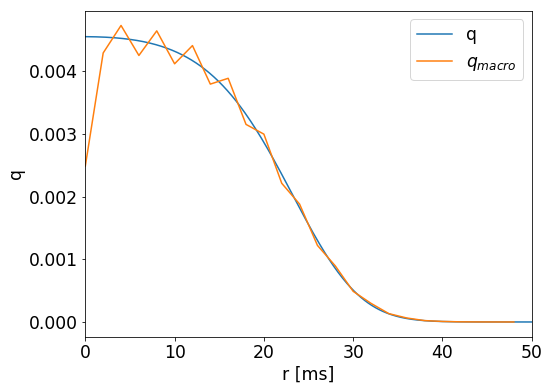

In [111]:
time=-1
t_q=[j*dt for j in range(N+1)]
plt.figure(figsize=(8,6))
plt.plot(t_q, q[:,time],label='q')
plt.plot(t_q_macro,q_macro,label='$q_{macro}$')
plt.xlabel('r [ms]')
plt.ylabel('q')
plt.legend()
plt.xlim(0,t_window)


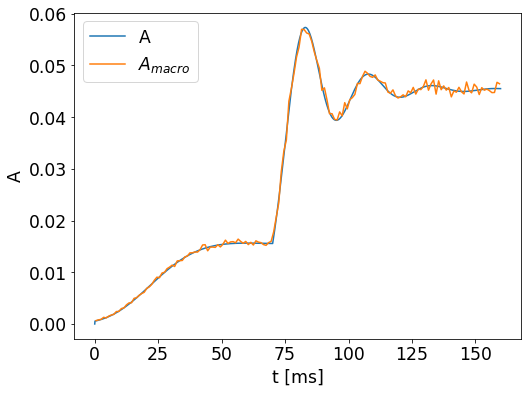

In [17]:
t_A=[(j)*dt for j in range(N_sim)]
plt.figure(figsize=(8,6))
plt.plot(t_A,A,label='A')
plt.plot(t_A_macro,A_macro,label='$A_{macro}$')
plt.xlabel('t [ms]')
plt.ylabel('A')
plt.legend()

## Leslie Matrix: $\mu=16mV$

In [16]:
ur=np.zeros((N+1,1))
rho=np.zeros((N,1))

mu_=16
for r in range(N):
    ur[r+1] = ur[r] * (1 - dt / tau)   + mu_*dt / tau
    rho[r] = C * np.exp((ur[r] - U_t) / D)

In [17]:
L=np.zeros((N+1,N+1))

In [18]:
for i in range(N):
    L[0,i]=rho[i]*dt
    L[i+1,i]=1-rho[i]*dt
    
L[0,N]=1#rho[N]*dt
L[N,N]=0#1-rho[N]*dt
    

In [19]:
eigv, v = np.linalg.eig(L)


(1+0j)


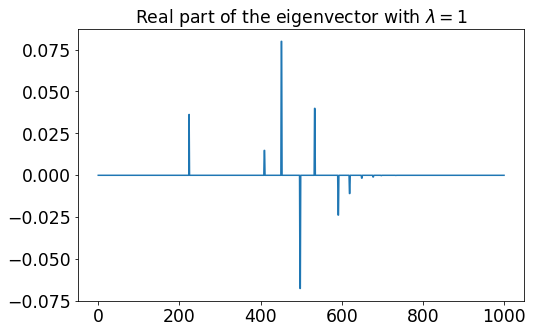

In [20]:
index_1=np.argmax(eigv)
print(eigv[index_1])
plt.title('Real part of the eigenvector with $\lambda=1$')
plt.plot(v[index_1].real)

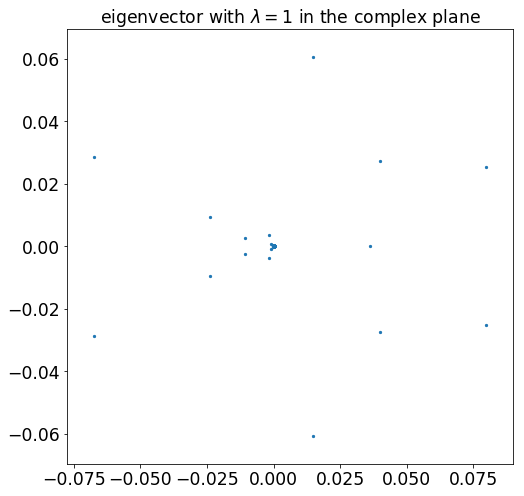

In [21]:
plt.figure(figsize=(8,8))
plt.title('eigenvector with $\lambda=1$ in the complex plane')
plt.scatter(v[index_1].real,v[index_1].imag,s=5)

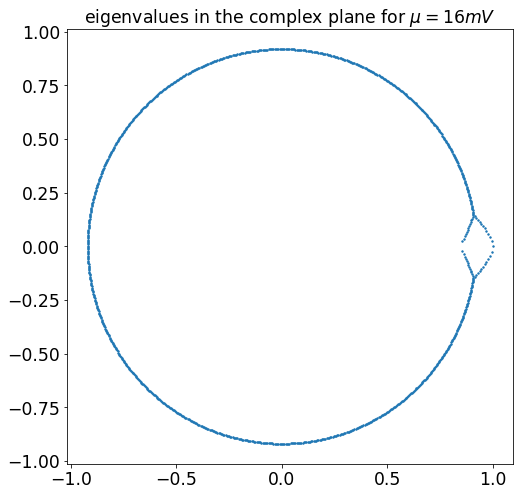

In [22]:
plt.figure(figsize=(8,8))
plt.title('eigenvalues in the complex plane for $\mu=16mV$')
plt.scatter(eigv.real,eigv.imag,s=2)

## eigenvalues varying $\mu$

In [26]:
mu_list=[8,12,14,16,18,20,22,24,26]
eigv_list=[]

In [27]:
for mu_ in mu_list:
    ur=np.zeros((N+1,1))
    rho=np.zeros((N,1))


    for r in range(N):
        ur[r+1] = ur[r] * (1 - dt / tau)   + mu_*dt / tau
        rho[r] = C * np.exp((ur[r] - U_t) / D)
        
    L=np.zeros((N+1,N+1))
    for i in range(N):
        L[0,i]=rho[i]*dt
        L[i+1,i]=1-rho[i]*dt
    
    L[0,N]=1
    L[N,N]=0
    eigv, v = np.linalg.eig(L)
    eigv_list.append(eigv)

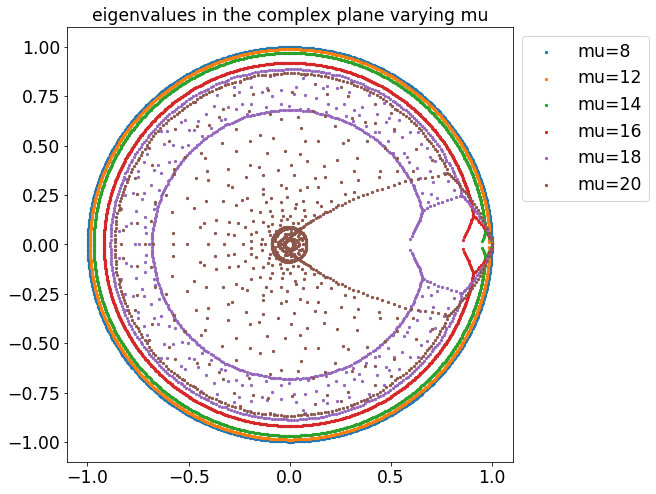

In [29]:
plt.figure(figsize=(8,8))
for i in range(6):
    eigv=eigv_list[i]
    plt.scatter(eigv.real,eigv.imag,s=5,label='mu='+str(mu_list[i]))
plt.legend(bbox_to_anchor=(1., 1.0))
plt.title('eigenvalues in the complex plane varying mu')

## Neuron forced to spike after $\tau_{max}$

In [8]:
t_window=100
N=int(t_window/dt)

u_old=np.zeros((N+1,1))
u_new=np.zeros((N+1,1))


q_old=np.zeros((N+1,1))
q_old[0]=1

q=np.zeros((N+1,int(N_sim/10)))

A=np.zeros((N_sim,1))

q_new=np.zeros((N+1,1))

i_store=0

for it in range(N_sim):
    
    
    t=it*dt
    
    
   
    A[it]=q_new[0]/dt
    q_new = np.zeros((N + 1, 1))
    u_new = np.zeros((N + 1, 1))

    for ir in range(N):
        u_new[ir+1 ] = u_old[ir] * (1 - dt / tau) + mu(t) * dt / tau

        rho = C * np.exp((u_old[ir] - U_t) / D)

        q_new[ir + 1] = q_old[ir] * (1 - dt * rho)
        q_new[0] += dt * rho * q_old[ir]

    #u_new[N] = u_old[N] * (1 - dt / tau) + mu(t) * dt / tau
    #rho = C * np.exp((u_old[N] - U_t) / D)
    #q_new[N] += q_old[N] * (1 - dt * rho)
    q_new[0] +=q_old[N]



    q_old = q_new
    u_old = u_new
    
    
    if it%10==0:
        
        q[:,i_store]=q_new.flatten()
        i_store+=1
        

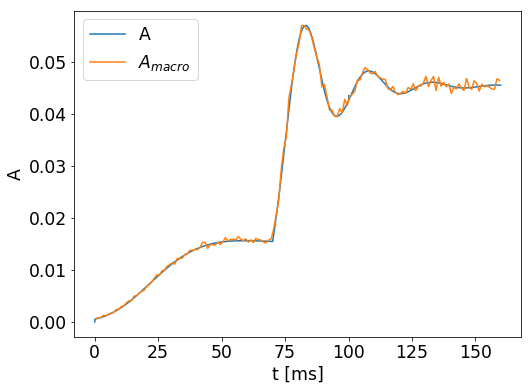

In [13]:
t_A=[(j)*dt for j in range(N_sim)]
plt.figure(figsize=(8,6))
plt.plot(t_A,A,label='A')
plt.plot(t_A_macro,A_macro,label='$A_{macro}$')
plt.xlabel('t [ms]')
plt.ylabel('A')
plt.legend()


(0, 100)

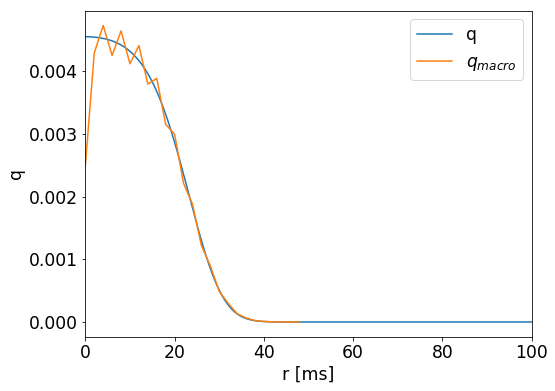

In [14]:
time=-1
t_q=[j*dt for j in range(N+1)]
plt.figure(figsize=(8,6))
plt.plot(t_q, q[:,time],label='q')
plt.plot(t_q_macro,q_macro,label='$q_{macro}$')
plt.xlabel('r [ms]')
plt.ylabel('q')
plt.legend()
plt.xlim(0,t_window)


## Starting from the differential equation $Lq=\lambda q$

In [6]:
t_window=200
dt=0.1
N=int(t_window/dt)

ur=np.zeros((N+1,1))
rho=np.zeros((N,1))

mu_=16
for r in range(N):
    ur[r+1] = ur[r] * (1 - dt / tau)   + mu_*dt / tau
    rho[r] = C * np.exp((ur[r] - U_t) / D)

In [7]:
A=np.zeros((N+1,N+1))

In [8]:
for i in range(N-1):
    A[0,i+1]=rho[i]*dt
    A[i+1,i+1]=-1-rho[i]*dt
    A[i+2,i+1]=1
    
A[0,0]=-1
A[1,0]=1
A[0,N]=1
A[N,N]=-1


In [9]:
q_ss=np.zeros((N+1,1))
q_ss[N]=1
q_ss[N-1]=1

for i in range(N-1):
    n=N-2-i
    q_ss[n]=q_ss[n+1]*(1+rho[n]*dt)

In [10]:
x=np.dot(A,q_ss)
np.max(x)

4.5531302161540525e+82

In [11]:
q_ss=q_ss/np.sum(q_ss)

(0, 200)

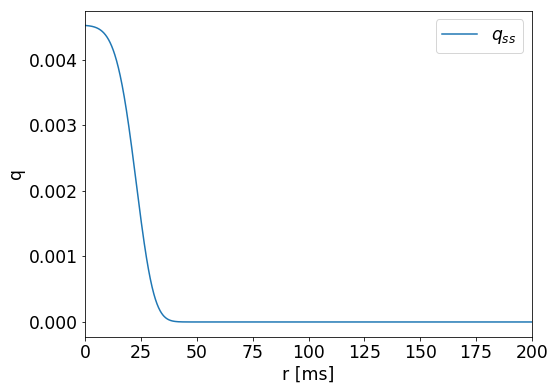

In [12]:
time=-1
t_ss=[j*dt for j in range(N+1)]
plt.figure(figsize=(8,6))
#plt.plot(t_q, q[:,time],label='q')
plt.plot(t_ss,q_ss,label='$q_{ss}$')
plt.xlabel('r [ms]')
plt.ylabel('q')
plt.legend()
plt.xlim(0,t_window)


In [13]:
eigv, v = np.linalg.eig(A)

In [14]:
zero_img=np.where(eigv.imag==0)

In [15]:
np.sum(v[idx].real)

NameError: name 'idx' is not defined

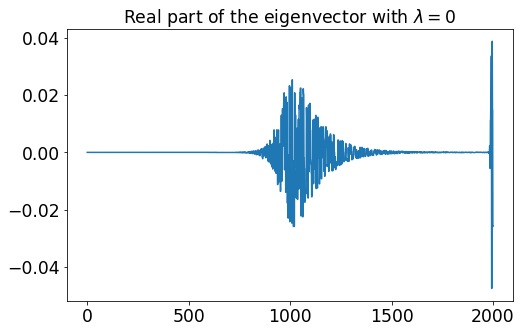

In [47]:
for idx in zero_img[0]:
    plt.figure()
    plt.title('Real part of the eigenvector with $\lambda=0$')
    plt.plot(v[idx].real)

(-0.2, 0.01)

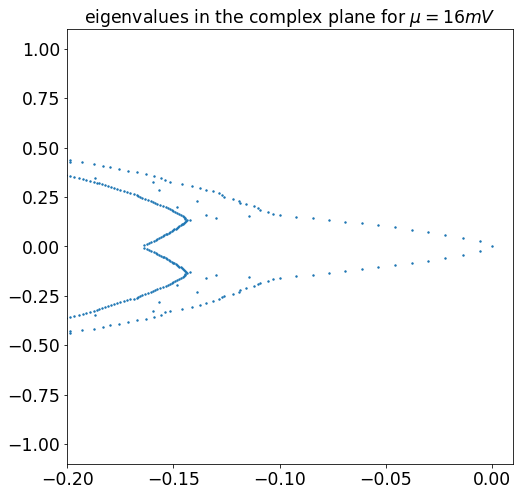

In [17]:
plt.figure(figsize=(8,8))
plt.title('eigenvalues in the complex plane for $\mu=16mV$')
plt.scatter(eigv.real,eigv.imag,s=2)
plt.xlim(-0.2,0.01)

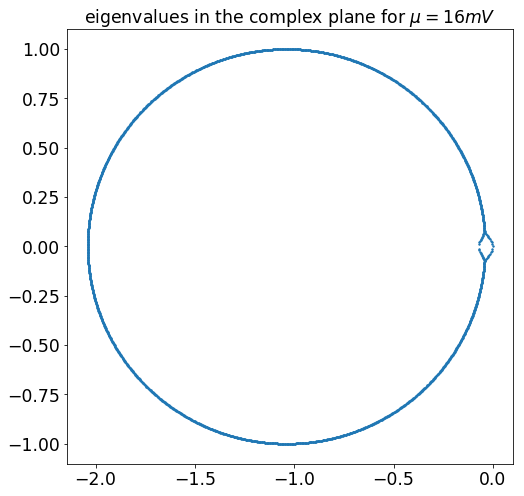

In [48]:
plt.figure(figsize=(8,8))
plt.title('eigenvalues in the complex plane for $\mu=16mV$')
plt.scatter(eigv.real,eigv.imag,s=2)

## convergence

In [116]:


t_window=100

dt_list=[5,2, 1, 0.5,0.2, 0.1, 0.05]

dt_eig=np.zeros((len(dt_list),3))

for idx_dt, dt in enumerate(dt_list):

    N=int(t_window/dt)

    ur=np.zeros((N+1,1))
    rho=np.zeros((N,1))

    mu_=16
    for r in range(N):
        ur[r+1] = ur[r] * (1 - dt / tau)   + mu_*dt / tau
        rho[r] = C * np.exp((ur[r] - U_t) / D)
    A=np.zeros((N+1,N+1))
    for i in range(N-1):
        A[0,i+1]=rho[i]*dt
        A[i+1,i+1]=-1-rho[i]*dt
        A[i+2,i+1]=1
        
    A[0,0]=-1
    A[1,0]=1
    A[0,N]=1
    A[N,N]=-1
    
    eigv, v = np.linalg.eig(A)
    
    real_eigv=eigv.real
    
    x=np.sort(real_eigv)
    
    dt_eig[idx_dt,0]=x[-1]
    dt_eig[idx_dt,1]=x[-2]
    dt_eig[idx_dt,2]=x[-4]


In [117]:
dt_eig

array([[ -9.91529833e-16,  -5.70003691e-01,  -1.00000000e+00],
       [ -8.34738425e-16,  -1.63298481e-01,  -4.33479325e-01],
       [  1.17745163e-16,  -6.91024963e-02,  -1.78335018e-01],
       [ -6.33828085e-17,  -3.12467772e-02,  -7.86981519e-02],
       [ -1.84638839e-15,  -1.16842938e-02,  -2.88517044e-02],
       [  2.21168485e-15,  -5.70464431e-03,  -1.39782110e-02],
       [ -2.11171558e-15,  -2.81778166e-03,  -6.87627853e-03]])

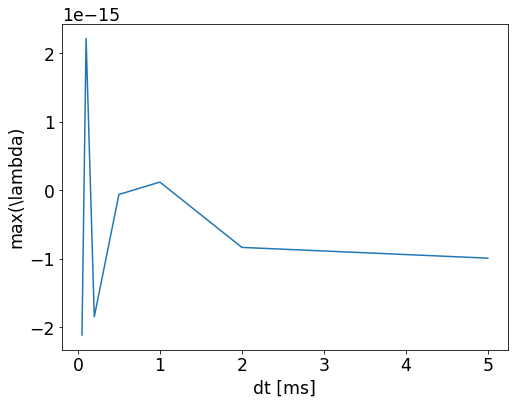

In [118]:

plt.figure(figsize=(8,6))
plt.plot(dt_list,dt_eig[:,0])
plt.xlabel('dt [ms]')
plt.ylabel('max(\lambda)')


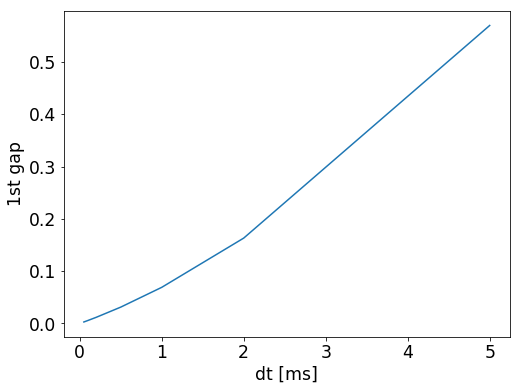

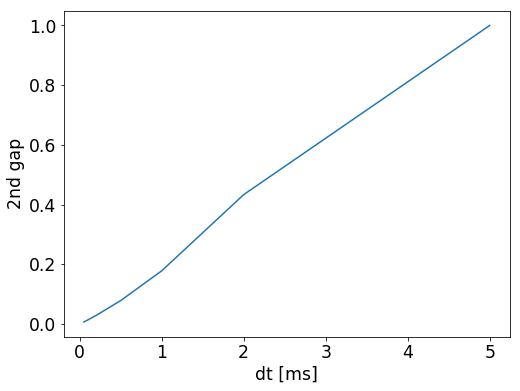

In [119]:

plt.figure(figsize=(8,6))
plt.plot(dt_list,dt_eig[:,0]-dt_eig[:,1])
plt.xlabel('dt [ms]')
plt.ylabel('1st gap')


plt.figure(figsize=(8,6))
plt.plot(dt_list,dt_eig[:,0]-dt_eig[:,2])
plt.xlabel('dt [ms]')
plt.ylabel('2nd gap')
